# MNIST

In [4]:
import numpy as np

# 데이터 불러오기
train_data = np.loadtxt("C:/Users/user/Desktop/work/Deep-Learning-from-Scratch/Chapter_3/mnist_train.csv", delimiter=',', dtype=np.float32)
test_data = np.loadtxt("C:/Users/user/Desktop/work/Deep-Learning-from-Scratch/Chapter_3/mnist_test.csv", delimiter=',', dtype=np.float32)

print(train_data.shape, test_data.shape)

(60000, 785) (10000, 785)


In [5]:
input_train_data = train_data[:, 1:]
target_train_data = train_data[:, 0]
input_test_data = test_data[:, 1:]
target_test_data = test_data[:, 0]

print(input_train_data.shape, target_train_data.shape, input_test_data.shape, target_test_data.shape)

(60000, 784) (60000,) (10000, 784) (10000,)


## 이미지 출력하기

In [14]:
from PIL import Image
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img = input_train_data[0]
label = target_train_data[0]
print(label)

img = img.reshape(28, 28)
img_show(img)

5.0


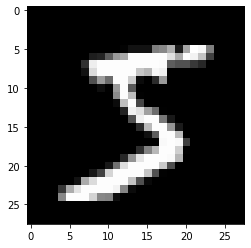

In [11]:
import matplotlib.pyplot as plt

img = input_train_data[0].reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [16]:
def softmax(x):
    exp_x = np.exp(x)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

In [15]:
def numerical_differentiation(f, x):
    delta_x = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = tmp_val + delta_x
        fx1 = f(x)

        x[idx] = tmp_val - delta_x
        fx2 = f(x)

        grad[idx] = (fx1 - fx2) / (2*delta_x)
        x[idx] = tmp_val

    return grad

In [ ]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.params = {}

        self.params['W1'] = np.random.rand(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = np.random.rand(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        self.learning_rate = learning_rate

        print("Two Layer Network object is now created!")
    
    def feed_forward(self, x, t):
        delta = 1e-7

        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        Z1 = np.dot(x, W1) + b1
        A1 = sigmoid(Z1)

        Z2 = np.dot(A1, W2) + b2
        y = A2 = softmax(Z2)
        
        return -np.sum( t*np.log(y+delta) + (1-t)*np.log((1-y)+delta) )
    
    def loss_function(self, x, t):
        delta = 1e-7

        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        Z1 = np.dot(x, W1) + b1
        A1 = sigmoid(Z1)

        Z2 = np.dot(A1, W2) + b2
        y = A2 = softmax(Z2)
        
        return -np.sum( t*np.log(y+delta) + (1-t)*np.log((1-y)+delta) )

    def train(self, x, t):
        f = lambda x : self.loss_function(x, t)

        self.params['W1'] -= self.learning_rate * numerical_differentiation(f, self.params['W1'])
        self.params['b1'] -= self.learning_rate * numerical_differentiation(f, self.params['b1'])
        self.params['W2'] -= self.learning_rate * numerical_differentiation(f, self.params['W2'])
        self.params['b2'] -= self.learning_rate * numerical_differentiation(f, self.params['b2'])

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        Z1 = np.dot(x, W1) + b1
        A1 = sigmoid(Z1)

        Z2 = np.dot(A1, W2) + b2
        y = A2 = softmax(Z2)

        predicted_num = np.argmax(y, axis=1)

        return predicted_num

    def accuracy(self, x, t):
        y = self.predict(x)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

In [ ]:
from datetime import datetime

net = TwoLayerNet(input_size=784, hidden_size=50, output_size=10, learning_rate=0.01)
epochs = 1
train_size = input_train_data.shape[0]
batch_size = 100

start_time = datetime.now()

for step in range(epochs):

    batch_mask = np.random.choice(train_size, batch_size)
    input_batch = input_train_data[batch_mask]
    target_batch = target_train_data[batch_mask]

    for index in range(len(train_data)):

        net.train(input_train_data, target_train_data)

        if(index % 200 == 0):
            print("step = ", step, "loss value = ", net.loss_function())
            
